In [1]:

from IPython.display import Markdown, display

from wid_config import WIDConfig
from wid_torch import *

import pandas as pd
import numpy as np
np.random.seed(42)
rng = np.random.default_rng(42)

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

from pathlib import Path
data_path = Path('./data')
data_dir = data_path / 'train_images'


import os
import pandas as pd
import torch
import torchvision.transforms as transforms
from torchvision.transforms import v2
from torch.utils.data import Dataset, DataLoader, Subset
from torchvision import models
import torch.nn as nn
import torch.optim as optim
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

torch.manual_seed(2024)

data/traininglabels.csv data/testlabels.csv data/holdout.csv
data/traininglabels.csv


2024-11-13 03:04 - WARNING - dropped 702 missing images
2024-11-13 03:04 - WARNING - dropped 0 missing images


## Load Data

data/traininglabels.csv data/testlabels.csv data/holdout.csv


### Test Data

,image_id,has_oilpalm,score,base_path
0,img_04925.jpg,0,1.0,data/leaderboard_test_data
1,img_04817.jpg,1,1.0,data/leaderboard_test_data
4,img_09008.jpg,0,1.0,data/leaderboard_test_data
5,img_05650.jpg,0,1.0,data/leaderboard_test_data
9,img_05861.jpg,0,1.0,data/leaderboard_test_data


### Test Data Distribution

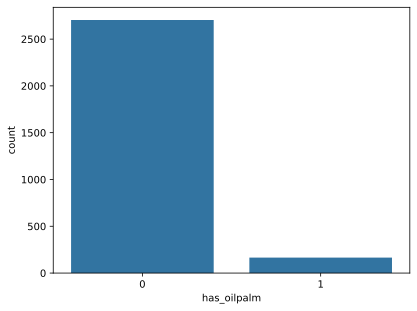

data/traininglabels.csv


2024-11-13 03:04 - WARNING - dropped 702 missing images


### Train Data

,image_id,has_oilpalm,score,base_path
0,img_00001.jpg,0,1.0,data/train_images
1,img_00002.jpg,0,1.0,data/train_images
2,img_00013.jpg,0,1.0,data/train_images
3,img_00014.jpg,0,1.0,data/train_images
4,img_00025.jpg,0,1.0,data/train_images


### Train Data Distribution

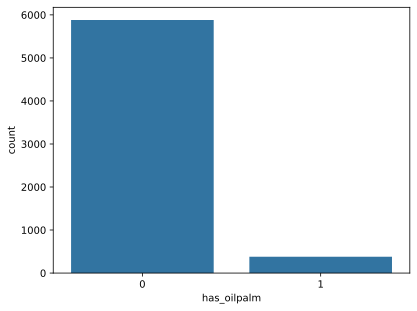

2024-11-13 03:04 - WARNING - dropped 0 missing images


### Train Data after Oversampling

,image_id,has_oilpalm,score,base_path
0,img_04459.jpg,0,1.0,data/leaderboard_test_data
1,img_03160.jpg,1,1.0,data/train_images
2,img_01224.jpg,0,1.0,data/train_images
3,img_08050.jpg,0,1.0,data/train_images
4,img_06870.jpg,0,1.0,data/train_images


### Train Data Distribution after Oversampling

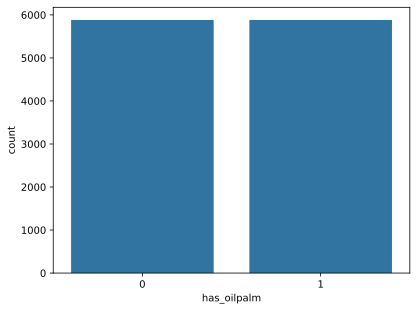

### Holdout Data

,image_id,has_oilpalm,score,base_path
0,img_050982017.jpg,1,1.0000,data/leaderboard_holdout_data
1,img_101882017.jpg,1,1.0000,data/leaderboard_holdout_data
2,img_109452017.jpg,1,0.8079,data/leaderboard_holdout_data
3,img_009842017.jpg,1,1.0000,data/leaderboard_holdout_data
4,img_083672017.jpg,1,1.0000,data/leaderboard_holdout_data


### Holdout Data Distribution

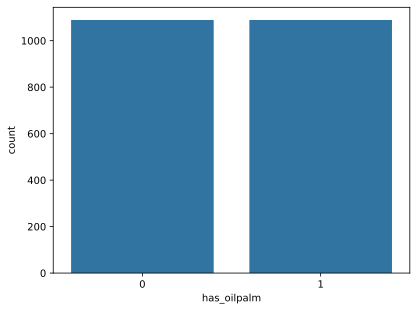

In [2]:
config = WIDConfig(verbose=True, model_name="resnet50")

# config.df = config.df.sample(n=1000, random_state=config.random_state)

## Instantiate wid_torch for PyTorch model 1

## define the model

In [3]:
# base model
_model = models.resnet50(weights="ResNet50_Weights.IMAGENET1K_V2")

# rebuild the head to suit our purpose
# strucure 2048 --> 32 --> num_classes
_model.fc = nn.Sequential(
    nn.Linear(_model.fc.in_features, 32),
    nn.BatchNorm1d(32),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(32, config.num_classes),
)
resnet_50 = WIDTorch(config=config, model=_model)

In [4]:
resnet_50.train(freeze=20)

Training model...
Model saved at epoch 1 (score)
Epoch [1/21], Loss: 0.5641, Val Loss: 0.5290, Val ROC AUC: 0.7975
Epoch [2/21], Loss: 0.5422, Val Loss: 0.5311, Val ROC AUC: 0.7959
Model saved at epoch 3 (score)
Epoch [3/21], Loss: 0.5378, Val Loss: 0.5220, Val ROC AUC: 0.8108
Model saved at epoch 4 (score)
Epoch [4/21], Loss: 0.5299, Val Loss: 0.5178, Val ROC AUC: 0.8167
Epoch [5/21], Loss: 0.5288, Val Loss: 0.5180, Val ROC AUC: 0.8146
Model saved at epoch 6 (score)
Epoch [6/21], Loss: 0.5267, Val Loss: 0.5123, Val ROC AUC: 0.8184
Epoch [7/21], Loss: 0.5228, Val Loss: 0.5150, Val ROC AUC: 0.8120
Model saved at epoch 8 (score)
Epoch [8/21], Loss: 0.5255, Val Loss: 0.5077, Val ROC AUC: 0.8289
Epoch [9/21], Loss: 0.5237, Val Loss: 0.5126, Val ROC AUC: 0.8227
Epoch [10/21], Loss: 0.5244, Val Loss: 0.5135, Val ROC AUC: 0.8186
Model saved at epoch 11 (score)
Epoch [11/21], Loss: 0.5179, Val Loss: 0.4996, Val ROC AUC: 0.8309
Epoch [12/21], Loss: 0.5109, Val Loss: 0.5018, Val ROC AUC: 0.8288


## Holdout ROC AUC: `0.9531`


              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1089
           1       0.97      0.87      0.91      1089

    accuracy                           0.92      2178
   macro avg       0.92      0.92      0.92      2178
weighted avg       0.92      0.92      0.92      2178




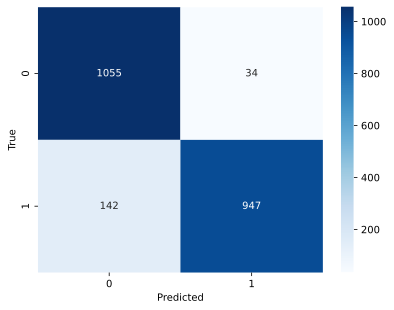

In [ ]:
resnet_50.resume(_model, "Exp:12_Model:resnet50_epoch:20_vloss:0.4933_auc:0.8398_S.pth")
resnet_50.evaluate_holdout()

In [10]:
resnet_50.train(freeze=False)

Training model...
Model saved at epoch 22 (score)
Epoch [22/100], Loss: 0.5928, Val Loss: 0.5761, Val ROC AUC: 0.7649
Model saved at epoch 23 (score)
Epoch [23/100], Loss: 0.5586, Val Loss: 0.5468, Val ROC AUC: 0.7791
Model saved at epoch 24 (score)
Epoch [24/100], Loss: 0.5506, Val Loss: 0.5399, Val ROC AUC: 0.7842
Model saved at epoch 25 (score)
Epoch [25/100], Loss: 0.5486, Val Loss: 0.5400, Val ROC AUC: 0.7893
Model saved at epoch 26 (score)
Epoch [26/100], Loss: 0.5470, Val Loss: 0.5263, Val ROC AUC: 0.7996
Epoch [27/100], Loss: 0.5411, Val Loss: 0.5678, Val ROC AUC: 0.7777
Epoch [28/100], Loss: 0.5372, Val Loss: 0.5336, Val ROC AUC: 0.7996
Model saved at epoch 29 (score)
Epoch [29/100], Loss: 0.5377, Val Loss: 0.5293, Val ROC AUC: 0.8045
Epoch [30/100], Loss: 0.5293, Val Loss: 0.5332, Val ROC AUC: 0.8035
Model saved at epoch 31 (loss)
Epoch [31/100], Loss: 0.5322, Val Loss: 0.5270, Val ROC AUC: 0.7988
Model saved at epoch 32 (score)
Epoch [32/100], Loss: 0.5273, Val Loss: 0.5123,

In [16]:
resnet_50.train(freeze=20)

Training model...
Model saved at epoch 98 (score)
Epoch [98/118], Loss: 0.2580, Val Loss: 0.2488, Val ROC AUC: 0.9587
Model saved at epoch 99 (score)
Epoch [99/118], Loss: 0.2569, Val Loss: 0.2445, Val ROC AUC: 0.9594
Model saved at epoch 100 (score)
Epoch [100/118], Loss: 0.2599, Val Loss: 0.2432, Val ROC AUC: 0.9638
Epoch [101/118], Loss: 0.2576, Val Loss: 0.2561, Val ROC AUC: 0.9563
Epoch [102/118], Loss: 0.2571, Val Loss: 0.2526, Val ROC AUC: 0.9564
Model saved at epoch 103 (loss)
Epoch [103/118], Loss: 0.2502, Val Loss: 0.2332, Val ROC AUC: 0.9608
Epoch [104/118], Loss: 0.2510, Val Loss: 0.2514, Val ROC AUC: 0.9578
Epoch [105/118], Loss: 0.2504, Val Loss: 0.2392, Val ROC AUC: 0.9605
Epoch [106/118], Loss: 0.2560, Val Loss: 0.2399, Val ROC AUC: 0.9623
Epoch [107/118], Loss: 0.2516, Val Loss: 0.2630, Val ROC AUC: 0.9570
Epoch [108/118], Loss: 0.2579, Val Loss: 0.2455, Val ROC AUC: 0.9606
Early stopping at epoch 108


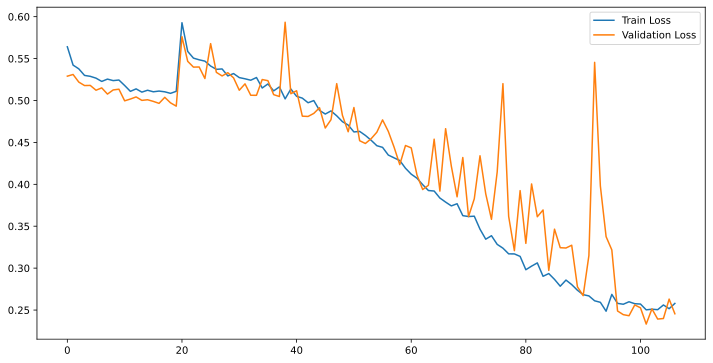

In [17]:
resnet_50.plot_losses()

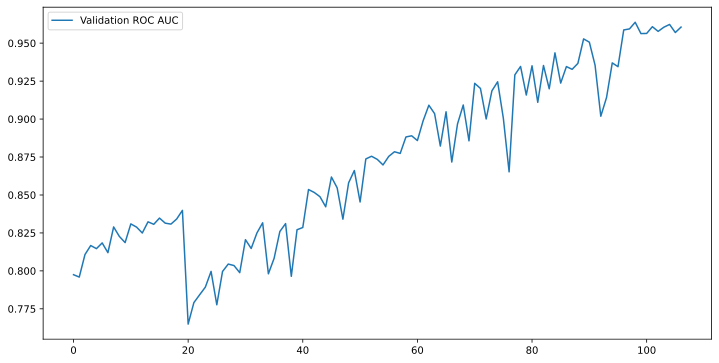

In [18]:
resnet_50.plot_scores()

## Load the best model and make predictions on the test set

### Early Stopped model

## Holdout ROC AUC: `0.9251`


              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1089
           1       0.92      0.83      0.87      1089

    accuracy                           0.88      2178
   macro avg       0.88      0.88      0.88      2178
weighted avg       0.88      0.88      0.88      2178




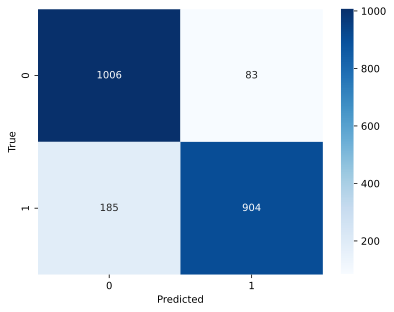

In [19]:
resnet_50.evaluate_holdout()

### Best Validation Loss Model

## Holdout ROC AUC: `0.9359`


              precision    recall  f1-score   support

           0       0.85      0.93      0.89      1089
           1       0.93      0.84      0.88      1089

    accuracy                           0.89      2178
   macro avg       0.89      0.89      0.89      2178
weighted avg       0.89      0.89      0.89      2178




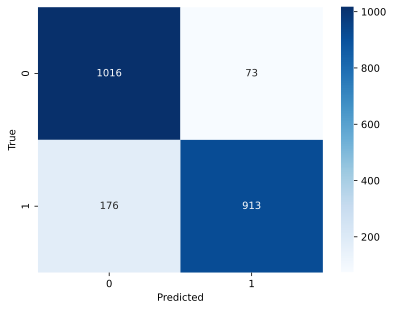

In [20]:
resnet_50.resume(
    _model, "Exp:12_Model:resnet50_epoch:103_vloss:0.2332_auc:0.9608_L.pth"
)
resnet_50.evaluate_holdout()